In [173]:
import pyam
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [21]:
df = pyam.IamDataFrame(data='./data/fair_magicc_total_nonCO2_temps.xlsx', encoding='utf-8')

INFO:root:Reading `./data/fair_magicc_total_nonCO2_temps.xlsx`


In [38]:
df_fair_expected_temp = df.filter(variable='AR5 climate diagnostics|Temperature|Global Mean|FAIR|Expected value').as_pandas()  
df_fair_expected_temp_nonCO2 = df.filter(variable='AR5 climate diagnostics|Temperature|Global Mean|FAIR|Expected value|Non CO2').as_pandas()  
df_magicc6_expected_temp = df.filter(variable='AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value').as_pandas()  
df_magicc6_expected_temp_nonCO2 = df.filter(variable='AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value|Non CO2').as_pandas()  

['AIM/CGE 2.0']
['ADVANCE_2020_1.5C-2100']
['AIM/CGE 2.0']
['ADVANCE_2020_1.5C-2100']


IndexError: index 14 is out of bounds for axis 0 with size 14

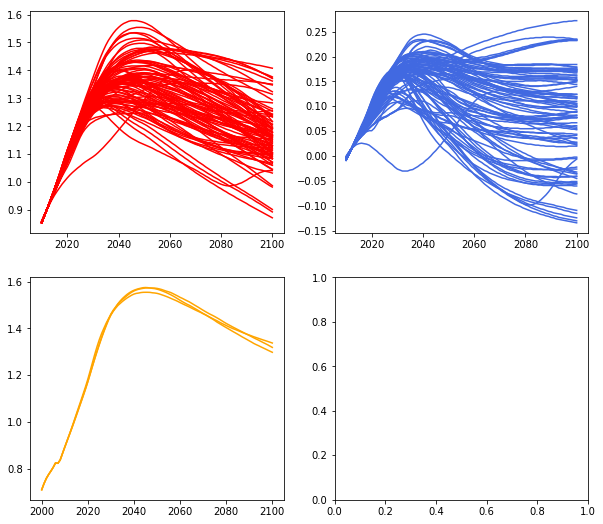

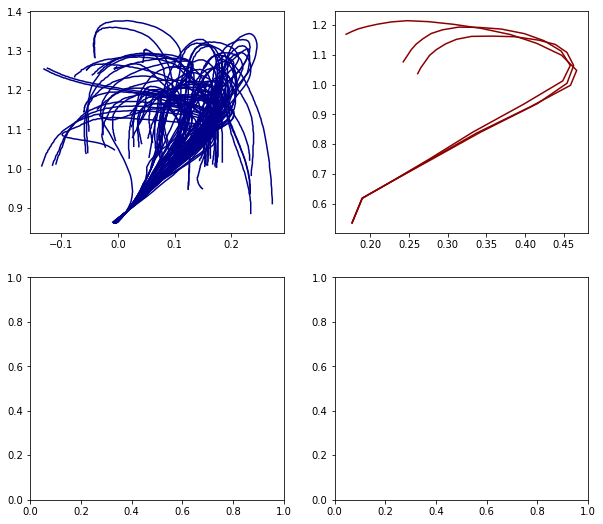

In [99]:
fig_total, ax_total = plt.subplots(2,2,figsize=(10,9))

fig_co2_vs_nonCO2, ax_co2_vs_nonCO2 = plt.subplots(2,2,figsize=(10,9))

for i in range(0, df_fair_expected_temp.model.unique().size):
#     print(df_fair_expected_temp.model.unique()[i])
    
    df_one_model = df_fair_expected_temp[df_fair_expected_temp.model==df_fair_expected_temp.model.unique()[i]]
    df_non_CO2_one_model = df_fair_expected_temp_nonCO2[df_fair_expected_temp_nonCO2.model==df_fair_expected_temp_nonCO2.model.unique()[i]]
    
    for j in range(0, df_one_model.scenario.unique().size):
        df_oneModel_oneScenario = df_one_model[df_one_model.scenario==df_one_model.scenario.unique()[j]]
        df_non_CO2_oneModel_oneScenario = df_non_CO2_one_model[df_non_CO2_one_model.scenario==df_non_CO2_one_model.scenario.unique()[j]]
        
        if i == 0 and j == 0:
            print(df_oneModel_oneScenario.model.unique())
            print(df_oneModel_oneScenario.scenario.unique())
            
            print(df_non_CO2_oneModel_oneScenario.model.unique())
            print(df_non_CO2_oneModel_oneScenario.scenario.unique())
        
        ax_total[0,0].plot(np.arange(2010,2101), df_oneModel_oneScenario.value, color='red')
        ax_co2_vs_nonCO2[0,0].plot(df_non_CO2_oneModel_oneScenario.value.values, df_oneModel_oneScenario.value.values - df_non_CO2_oneModel_oneScenario.value.values, color='darkblue')
    
for i in range(0, df_fair_expected_temp_nonCO2.model.unique().size):
#     print(df_fair_expected_temp_nonCO2.model.unique()[i])
    
    df_one_model = df_fair_expected_temp_nonCO2[df_fair_expected_temp_nonCO2.model==df_fair_expected_temp_nonCO2.model.unique()[i]]   
    
    for j in range(0, df_one_model.scenario.unique().size):
        df_oneModel_oneScenario = df_one_model[df_one_model.scenario==df_one_model.scenario.unique()[j]]
    
#         if i == 0 and j == 0:
#             print(df_oneModel_oneScenario.model.unique())
#             print(df_oneModel_oneScenario.scenario.unique())
            
        ax_total[0,1].plot(np.arange(2010,2101), df_oneModel_oneScenario.value, color='royalblue')
        
#         print(df_oneModel_oneScenario.value.values[0])
    
    
# print(df_magicc6_expected_temp.model.unique())
# print(df_magicc6_expected_temp_nonCO2.model.unique())

# for i in range(0, df_magicc6_expected_temp.model.unique().size):
#     print(df_magicc6_expected_temp.model.unique()[i])
for i in [0,1,3,4,5,6,7,8,10,12,13,14,15,16]:
    df_one_model = df_magicc6_expected_temp[df_magicc6_expected_temp.model==df_magicc6_expected_temp.model.unique()[i]]   
    df_non_CO2_one_model = df_magicc6_expected_temp_nonCO2[df_magicc6_expected_temp_nonCO2.model==df_magicc6_expected_temp_nonCO2.model.unique()[i]]

#     if i == 0:
#         print(df_non_CO2_one_model.scenario.unique().size)
#         print(df_one_model.scenario.unique().size)
    if (df_one_model.scenario.unique().size == df_non_CO2_one_model.scenario.unique().size):
        
        for j in range(0, df_one_model.scenario.unique().size):
            df_oneModel_oneScenario = df_one_model[df_one_model.scenario==df_one_model.scenario.unique()[j]]
            df_non_CO2_oneModel_oneScenario = df_non_CO2_one_model[df_non_CO2_one_model.scenario==df_non_CO2_one_model.scenario.unique()[j]]

#             if i == 0 and j == 0:
#                 print(df_oneModel_oneScenario.model.unique())
#                 print(df_oneModel_oneScenario.scenario.unique())
            
#                 print(df_oneModel_oneScenario.value.values[0::5])
#                 print(df_non_CO2_oneModel_oneScenario.value.values)
            
            
            ax_total[1,0].plot(np.arange(2000,2101), df_oneModel_oneScenario.value, color='orange')
            ax_co2_vs_nonCO2[0,1].plot(df_non_CO2_oneModel_oneScenario.value.values, df_oneModel_oneScenario.value.values[0::5] - df_non_CO2_oneModel_oneScenario.value.values, color='darkred')
        
for i in range(0, df_magicc6_expected_temp_nonCO2.model.unique().size):
#     print(df_magicc6_expected_temp_nonCO2.model.unique()[i])
    
    df_one_model = df_magicc6_expected_temp_nonCO2[df_magicc6_expected_temp_nonCO2.model==df_magicc6_expected_temp_nonCO2.model.unique()[i]]   
    
    for j in range(0, df_one_model.scenario.unique().size):
        df_oneModel_oneScenario = df_one_model[df_one_model.scenario==df_one_model.scenario.unique()[j]]
    
#         if i == 0 and j == 0:
#             print(df_oneModel_oneScenario.model.unique())
#             print(df_oneModel_oneScenario.scenario.unique())
            
        ax_total[1,1].plot(np.arange(2000,2101,5), df_oneModel_oneScenario.value, color='green')
    
# print(df_fair_expected_temp.value.values)

In [105]:
print(df_magicc6_expected_temp.model.unique().size)
print(df_magicc6_expected_temp_nonCO2.model.unique().size)

df_magicc6_expected_temp_subset = np.take(df_magicc6_expected_temp.model.unique(), [0,1,3,4,5,6,7,8,10,12,13,14,15,16])

for i in range(0,df_magicc6_expected_temp_subset.size):
    df_one_model = df_magicc6_expected_temp[df_magicc6_expected_temp.model==df_magicc6_expected_temp_subset[i]]   
    df_non_CO2_one_model = df_magicc6_expected_temp_nonCO2[df_magicc6_expected_temp_nonCO2.model==df_magicc6_expected_temp_subset[i]]

    print(i)
    print(df_non_CO2_one_model.scenario.unique())
    print(df_one_model.scenario.unique())
    


18
14
0
['ADVANCE_2020_1.5C-2100' 'SSP1-19' 'SSP2-19']
['ADVANCE_2020_1.5C-2100' 'SSP1-19' 'SSP2-19']
1
['EMF33_WB2C_cost100' 'TERL_15D_LowCarbonTransportPolicy'
 'TERL_15D_NoTransportPolicy']
['CD-LINKS_NPi2020_400' 'EMF33_WB2C_cost100'
 'TERL_15D_LowCarbonTransportPolicy' 'TERL_15D_NoTransportPolicy']
2
['SSP1-19' 'SSP2-19' 'SSP5-19']
['SSP1-19' 'SSP2-19' 'SSP5-19']
3
['ADVANCE_2020_1.5C-2100' 'IMA15-AGInt' 'IMA15-Def' 'IMA15-Eff'
 'IMA15-LiStCh' 'IMA15-LoNCO2' 'IMA15-Pop' 'IMA15-RenElec' 'IMA15-TOT'
 'SSP1-19']
['ADVANCE_2020_1.5C-2100' 'CD-LINKS_NPi2020_400' 'IMA15-AGInt' 'IMA15-Def'
 'IMA15-Eff' 'IMA15-LiStCh' 'IMA15-LoNCO2' 'IMA15-Pop' 'IMA15-RenElec'
 'IMA15-TOT' 'SSP1-19']
4
['DAC15_50']
['DAC15_50']
5
['ADVANCE_2020_1.5C-2100' 'ADVANCE_2030_Price1.5C' 'EMF33_1.5C_cost100'
 'EMF33_1.5C_full' 'EMF33_WB2C_cost100' 'EMF33_WB2C_full'
 'EMF33_WB2C_limbio' 'EMF33_WB2C_nofuel']
['ADVANCE_2020_1.5C-2100' 'ADVANCE_2030_Price1.5C' 'EMF33_1.5C_cost100'
 'EMF33_1.5C_full' 'EMF33_WB2C_cost1

In [145]:
output_total = np.array([])
output_nonCO2 = np.array([])

models_magicc6_total = df_magicc6_expected_temp.model.unique()
models_magicc6_nonCO2 = df_magicc6_expected_temp_nonCO2.model.unique()

if len(models_magicc6_total) > len(models_magicc6_nonCO2):
    len_models = len(models_magicc6_total)
else:
    len_models = len(models_magicc6_nonCO2)
    
for i in range(0, len_models):
    if len(models_magicc6_total) > len(models_magicc6_nonCO2):
        model_name = models_magicc6_total[i]
    else:
        model_name = models_magicc6_nonCO2[i]
    
    if model_name in models_magicc6_total and model_name in models_magicc6_nonCO2:
        df_one_model_total = df_magicc6_expected_temp[df_magicc6_expected_temp.model == model_name]
        df_one_model_nonCO2 = df_magicc6_expected_temp_nonCO2[df_magicc6_expected_temp_nonCO2.model == model_name]    
        
        scens_oneModel_total = df_one_model_total.scenario.unique()
        scens_oneModel_nonCO2 = df_one_model_nonCO2.scenario.unique()

        if len(scens_oneModel_total) > len(scens_oneModel_nonCO2):
            len_scenarios = len(scens_oneModel_total)
        else:
            len_scenarios = len(scens_oneModel_nonCO2)

        for j in range(0, len_scenarios):
            if len(scens_oneModel_total) > len(scens_oneModel_nonCO2):
                scen_name = scens_oneModel_total[j]
            else:
                scen_name = scens_oneModel_nonCO2[j]
        
        if scen_name in scens_oneModel_total and scen_name in scens_oneModel_nonCO2:
            df_oneModel_oneScen_total = df_one_model_total[df_one_model_total.scenario == scen_name]
            df_oneModel_oneScen_nonCO2 = df_one_model_nonCO2[df_one_model_nonCO2.scenario == scen_name]    
            
            output_total = np.append(output_total, df_oneModel_oneScen_total)
            output_nonCO2 = np.append(output_nonCO2, df_oneModel_oneScen_nonCO2)
            
output_total = np.reshape(output_total, (int(output_total.shape[0]/7),7))
output_nonCO2 = np.reshape(output_nonCO2, (int(output_nonCO2.shape[0]/7),7))



In [154]:
output_total_fair = np.array([])
output_nonCO2_fair = np.array([])

models_fair_total = df_fair_expected_temp.model.unique()
models_fair_nonCO2 = df_fair_expected_temp_nonCO2.model.unique()

if len(models_fair_total) > len(models_fair_nonCO2):
    len_models = len(models_fair_total)
else:
    len_models = len(models_fair_nonCO2)
    
for i in range(0, len_models):
    if len(models_fair_total) > len(models_fair_nonCO2):
        model_name = models_fair_total[i]
    else:
        model_name = models_fair_nonCO2[i]
    
    if model_name in models_fair_total and model_name in models_fair_nonCO2:
        df_one_model_total = df_fair_expected_temp[df_fair_expected_temp.model == model_name]
        df_one_model_nonCO2 = df_fair_expected_temp_nonCO2[df_fair_expected_temp_nonCO2.model == model_name]    
        
        scens_oneModel_total = df_one_model_total.scenario.unique()
        scens_oneModel_nonCO2 = df_one_model_nonCO2.scenario.unique()

        if len(scens_oneModel_total) > len(scens_oneModel_nonCO2):
            len_scenarios = len(scens_oneModel_total)
        else:
            len_scenarios = len(scens_oneModel_nonCO2)

        for j in range(0, len_scenarios):
            if len(scens_oneModel_total) > len(scens_oneModel_nonCO2):
                scen_name = scens_oneModel_total[j]
            else:
                scen_name = scens_oneModel_nonCO2[j]
        
        if scen_name in scens_oneModel_total and scen_name in scens_oneModel_nonCO2:
            df_oneModel_oneScen_total = df_one_model_total[df_one_model_total.scenario == scen_name]
            df_oneModel_oneScen_nonCO2 = df_one_model_nonCO2[df_one_model_nonCO2.scenario == scen_name]    
            
            output_total_fair = np.append(output_total_fair, df_oneModel_oneScen_total)
            output_nonCO2_fair = np.append(output_nonCO2_fair, df_oneModel_oneScen_nonCO2)
            
output_total_fair = np.reshape(output_total_fair, (int(output_total_fair.shape[0]/7),7))
output_nonCO2_fair = np.reshape(output_nonCO2_fair, (int(output_nonCO2_fair.shape[0]/7),7))




invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c


['AIM/CGE 2.0' 'SSP2-19' 'World'
 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value'
 '°C' 2000 0.712350586]
['AIM/CGE 2.0' 'SSP2-19' 'World'
 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value|Non CO2'
 '°C' 2000 0.176202144]
['AIM/CGE 2.0' 'SSP2-19' 'World'
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|Expected value'
 '°C' 2010 0.857]
['AIM/CGE 2.0' 'SSP2-19' 'World'
 'AR5 climate diagnostics|Temperature|Global Mean|FAIR|Expected value|Non CO2'
 '°C' 2010 -0.005]


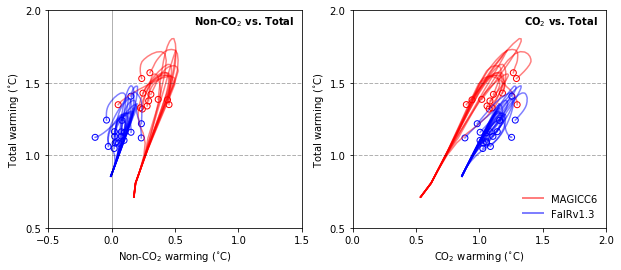

In [204]:
fig_test, ax_test = plt.subplots(1,2, figsize=(10,4))
ax_test[0].set_xlim(-0.5,1.5)
ax_test[0].set_ylim(0.5,2)
ax_test[1].set_xlim(0,2)
ax_test[1].set_ylim(0.5,2)

print(output_total[0,:])
print(output_nonCO2[0,:])

model_list = np.unique(output_total[:,0])
for model in model_list:
    
    df_one_model_total = output_total[output_total[:,0]==model]
    df_one_model_nonCO2 = output_nonCO2[output_nonCO2[:,0]==model]
    
    scen_list = np.unique(df_one_model_total[:,1])
    
    for scen in scen_list:
        
        ax_test[0].plot(df_one_model_nonCO2[df_one_model_nonCO2[:,1]==scen][:,6], df_one_model_total[df_one_model_total[:,1]==scen][::5,6], color='red', alpha=0.5)
        
        ax_test[1].plot(df_one_model_total[df_one_model_total[:,1]==scen][0::5,6] - df_one_model_nonCO2[df_one_model_nonCO2[:,1]==scen][:,6], df_one_model_total[df_one_model_total[:,1]==scen][0::5,6], color='red', alpha=0.5)    

        ax_test[0].scatter(df_one_model_nonCO2[df_one_model_nonCO2[:,1]==scen][-1,6], df_one_model_total[df_one_model_total[:,1]==scen][-1,6], color='red', facecolors='none')
        
        ax_test[1].scatter(df_one_model_total[df_one_model_total[:,1]==scen][-1,6] - df_one_model_nonCO2[df_one_model_nonCO2[:,1]==scen][-1,6], df_one_model_total[df_one_model_total[:,1]==scen][-1,6], color='red', facecolors='none')

# fig_test_fair, ax_test_fair = plt.subplots(1,2, figsize=(10,6))
# ax_test_fair[0].set_xlim(-0.5,2)
# ax_test_fair[0].set_ylim(-0.5,2)
# ax_test_fair[1].set_xlim(-0.5,2)
# ax_test_fair[1].set_ylim(-0.5,2)

print(output_total_fair[0,:])
print(output_nonCO2_fair[0,:])

model_list = np.unique(output_total_fair[:,0])
for model in model_list:
    
    df_one_model_total = output_total_fair[output_total_fair[:,0]==model]
    df_one_model_nonCO2 = output_nonCO2_fair[output_nonCO2_fair[:,0]==model]
    
    scen_list = np.unique(df_one_model_total[:,1])
    
    for scen in scen_list:
        
        ax_test[0].plot(df_one_model_nonCO2[df_one_model_nonCO2[:,1]==scen][:,6], df_one_model_total[df_one_model_total[:,1]==scen][:,6], color='blue', alpha=0.5)
        
        ax_test[1].plot(df_one_model_total[df_one_model_total[:,1]==scen][:,6] - df_one_model_nonCO2[df_one_model_nonCO2[:,1]==scen][:,6], df_one_model_total[df_one_model_total[:,1]==scen][:,6], color='blue', alpha=0.5)
        
        ax_test[0].scatter(df_one_model_nonCO2[df_one_model_nonCO2[:,1]==scen][-1,6], df_one_model_total[df_one_model_total[:,1]==scen][-1,6], color='blue', facecolors='none')
        
        ax_test[1].scatter(df_one_model_total[df_one_model_total[:,1]==scen][-1,6] - df_one_model_nonCO2[df_one_model_nonCO2[:,1]==scen][-1,6], df_one_model_total[df_one_model_total[:,1]==scen][-1,6], color='blue', facecolors='none')
        

legend_elements = [Line2D([0], [0], color='red', lw=2, label='MAGICC6', alpha=0.5),
                  Line2D([0], [0], color='blue', lw=2, label='FaIRv1.3', alpha=0.5)]

ax_test[1].legend(handles=legend_elements, loc='lower right', framealpha=0.0, edgecolor=None)

ax_test[0].axvline(x=0.0, color='black', linewidth=1.0, alpha=0.3)
ax_test[0].axhline(y=1.0, color='black', linewidth=1.0, linestyle='--', alpha=0.3)
ax_test[1].axhline(y=1.0, color='black', linewidth=1.0, linestyle='--', alpha=0.3)
ax_test[0].axhline(y=1.5, color='black', linewidth=1.0, linestyle='--', alpha=0.3)
ax_test[1].axhline(y=1.5, color='black', linewidth=1.0, linestyle='--', alpha=0.3)

ax_test[0].text(0.65,1.9,'Non-CO$_2$ vs. Total', fontweight='bold')
ax_test[1].text(1.35,1.9,'CO$_2$ vs. Total', fontweight='bold')

ax_test[0].set_xlabel('Non-CO$_2$ warming ($^{\circ}$C)')
ax_test[0].set_ylabel('Total warming ($^{\circ}$C)')
ax_test[1].set_xlabel('CO$_2$ warming ($^{\circ}$C)')
ax_test[1].set_ylabel('Total warming ($^{\circ}$C)')

ax_test[0].set_xticks([-0.5,0,0.5,1.0,1.5])
ax_test[1].set_xticks([0,0.5,1.0,1.5,2.0])

ax_test[0].set_yticks([0.5,1.0,1.5,2.0])
ax_test[1].set_yticks([0.5,1.0,1.5,2.0])

# fig_test.savefig('test.pdf', dpi=300)